# Load libs

In [62]:
#Clustering
from sklearn import *
import numpy as np
import hdbscan

#Plotting
import matplotlib.pyplot as plt

#Regexp
import re

## Functions

In [63]:
def remove_from_cluster(data, labels, label = -1):
    new_data = np.empty((0, data.shape[1]), float)
    new_labels = []
    for i in range(len(labels)):
        if (labels[i] != label):
            new_labels.append(labels[i])
            new_data = np.append(new_data, np.array([data[i]]), axis = 0)
    return new_data, new_labels

## Reading file

In [64]:
f = open("D:\\_Univer\\___DIPLOMA\\GraduationWork-master\\DATA\\frame_20_4.txt", "r")
#f = open("D:\\_Univer\\__NIRS\\Source\\frame_1.txt")
contents = f.readlines()

#Regexp
pattern = re.compile("[^\t\n]+")

#Loading file
dataset = np.empty((0, 5), float)

x_axis = []
y_axis = []

for i, x in enumerate(contents, start = 0):
    if (i < 2):
        continue
         
    if (i == 2):
        x_axis = [float(z) for z in pattern.findall(x)]
        print(len(x_axis))
        continue
    
    items = [float(z) for z in pattern.findall(x)]
    y_axis.append(items[0])
    for j in range(1, len(x_axis) + 1):
        if (items[j] > 0):
            dataset = np.append(dataset, np.array([[x_axis[j - 1], items[0], float(i), float(j), items[j]]]), axis = 0)
            
print(dataset)

300
[[ -40.      20.       7.      31.     140.692]
 [ 416.      20.       7.     259.     367.611]
 [ 426.      20.       7.     264.    1000.01 ]
 ...
 [ 368.     885.     180.     235.     277.152]
 [ 310.     890.     181.     206.     703.753]
 [ 366.     900.     183.     234.     974.453]]


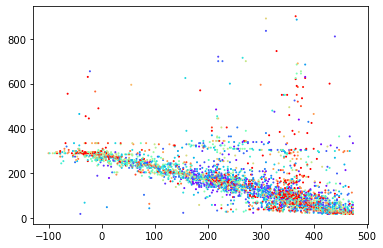

In [65]:
plt.scatter(dataset[:,0], dataset[:,1], c = dataset[:,4], cmap='rainbow', s = 1)

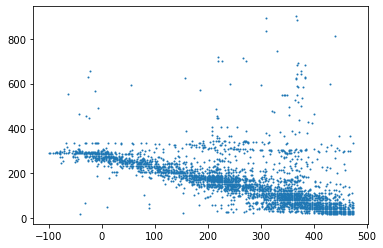

In [66]:
plt.scatter(dataset[:,0], dataset[:,1], cmap='rainbow', s = 1)

## Searching for clearing

Amount of dots per line:


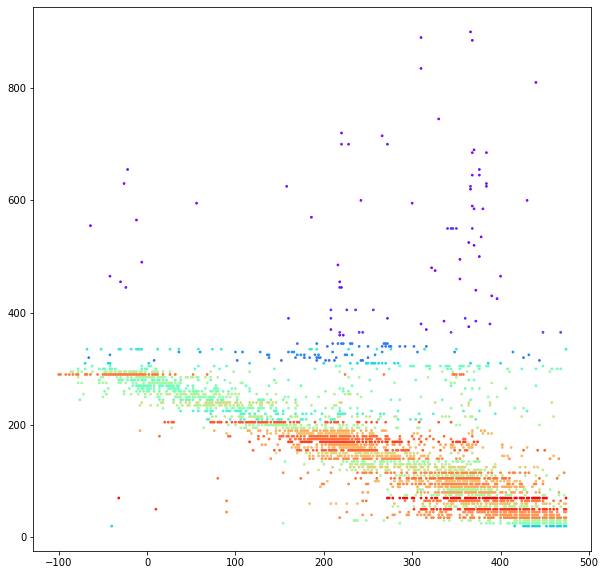

In [67]:
dictionary = {}

for x in dataset:
    dictionary.setdefault(x[1], [])
    dictionary[x[1]].append(x[0])
    
#print(dictionary)

tmp_labels = []
for x in dataset:
    tmp = len(dictionary[x[1]])
    tmp_labels.append(tmp)
    
#print(tmp_labels)

print("Amount of dots per line:")
plt.figure(figsize=(10,10))
plt.scatter(dataset[:,0], dataset[:,1], c = tmp_labels, cmap='rainbow', s = 3)

In [68]:
average = 0
for k in dictionary.keys():
    average += len(dictionary[k])
average /= len(dictionary.keys())
print("Average:", average)



Average: 23.464912280701753


## Algirthms

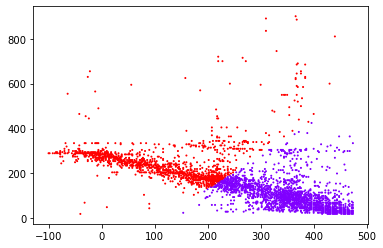

In [69]:
kmeans = cluster.KMeans(n_clusters = 2)
kmeans.fit(dataset[:, 0:2])
plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_, cmap='rainbow', s = 1)

[-1 -1 -1 ... -1 -1 -1]


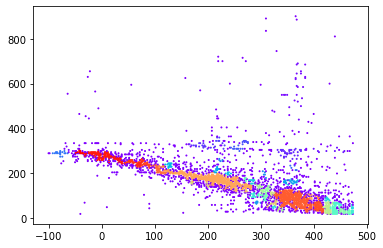

In [70]:
_hdbscan = hdbscan.HDBSCAN()
_hdbscan.fit(dataset[:, 2:4])
plt.figure()
plt.scatter(dataset[:,0], dataset[:,1], c=_hdbscan.labels_, cmap='rainbow', s = 1)
print(_hdbscan.labels_)

[-1  0  0 ... -1 -1 -1]


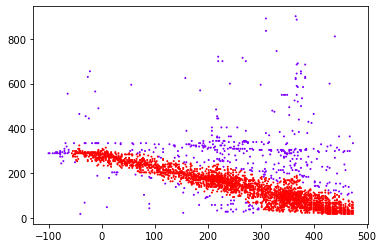

In [71]:
#dbscan = cluster.DBSCAN(eps = 5, min_samples = 20)
#bad one
dbscan = cluster.DBSCAN(eps = 5, min_samples = 20)
dbscan.fit(dataset[:, 2:4])
plt.figure() #figsize=(5,5)
plt.scatter(dataset[:,0], dataset[:,1], c=dbscan.labels_, cmap='rainbow', s = 1)
print(dbscan.labels_)

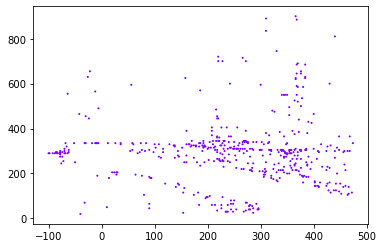

In [72]:
new_data, labels = remove_from_cluster(dataset, dbscan.labels_, 0);   
plt.scatter(new_data[:,0], new_data[:,1], c=labels, cmap='rainbow', s = 1)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

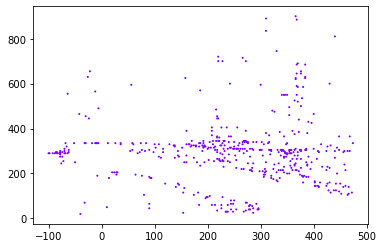

In [73]:
dbscan2 = cluster.DBSCAN(eps = 15, min_samples = 24)
#dbscan2 = hdbscan.HDBSCAN()

#preparing data
cur_data = new_data.copy()
cur_data[:, 2] *= 10

dbscan2.fit(cur_data[:, 2:4])
plt.figure() #figsize=(5,5)
plt.scatter(cur_data[:,0], cur_data[:,1], c=dbscan2.labels_, cmap='rainbow', s = 1)
print(dbscan2.labels_)

Amount of dots per line:


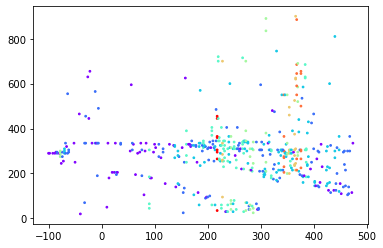

In [74]:
dic = {}
for y in new_data:
    dic.setdefault(y[0], [])
    dic[y[0]].append(y[1])
    
#print(dictionary)

tmp_labels = []
for x in new_data:
    tmp = len(dic[x[0]])
    tmp_labels.append(tmp)
    
#print(tmp_labels)

#calculating average

#for i, x in enumerate(tmp_labels, start = 0):
   # tmp_labels[i] 
    
print("Amount of dots per line:")
plt.figure()
plt.scatter(new_data[:,0], new_data[:,1], c = tmp_labels, cmap='rainbow', s = 3)

Amount of dots per line:


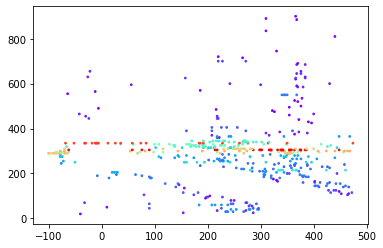

In [75]:
dic = {}
for x in new_data:
    dic.setdefault(x[1], [])
    dic[x[1]].append(x[0])
    
#print(dictionary)

tmp_labels = []
for x in new_data:
    tmp = len(dic[x[1]])
    tmp_labels.append(tmp)
    
#print(tmp_labels)

#calculating average

#for i, x in enumerate(tmp_labels, start = 0):
   # tmp_labels[i] 
    
print("Amount of dots per line:")
plt.figure()
plt.scatter(new_data[:,0], new_data[:,1], c = tmp_labels, cmap='rainbow', s = 3)

In [76]:
dataset[:,3] * 2
print(dataset[:, 2:4] )

[[  7.  31.]
 [  7. 259.]
 [  7. 264.]
 ...
 [180. 235.]
 [181. 206.]
 [183. 234.]]


## Some tests

In [77]:
def average(lst): 
    return sum(lst) / len(lst) 

lens = []
for k in dic.keys():
    lens.append(len(dic[k]))
    
#lens.sort()

print(lens, len(lens))
#print("average: ", )

tmp = lens[0] + lens[1] + lens[2]
test = [tmp]
for i in range(1, len(lens) - 2):
    tmp -= lens[i - 1]
    tmp += lens[i + 2]
    test.append(tmp)

print(test, len(test))
    
avrg = average(lens)
print("average: ", avrg)

maxdif = 0
maxp = 0
for i in range(1, len(lens)):
    if (i == 0):
        continue
    
    if (maxdif < lens[i] - lens[i - 1]):
        maxdif = lens[i] - lens[i - 1]
        maxp = lens[i - 1]
        
print(maxdif)
print(maxp)

[1, 2, 5, 2, 6, 4, 1, 2, 6, 4, 3, 2, 1, 3, 1, 3, 2, 4, 1, 3, 1, 4, 5, 1, 5, 4, 2, 1, 1, 5, 5, 5, 5, 3, 7, 5, 10, 5, 5, 4, 4, 4, 5, 9, 7, 4, 6, 6, 8, 7, 5, 19, 15, 20, 26, 18, 9, 11, 12, 13, 24, 11, 11, 2, 6, 2, 1, 2, 2, 4, 4, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1] 111
[8, 9, 13, 12, 11, 7, 9, 12, 13, 9, 6, 6, 5, 7, 6, 9, 7, 8, 5, 8, 10, 10, 11, 10, 11, 7, 4, 7, 11, 15, 15, 13, 15, 15, 22, 20, 20, 14, 13, 12, 13, 18, 21, 20, 17, 16, 20, 21, 20, 31, 39, 54, 61, 64, 53, 38, 32, 36, 49, 48, 46, 24, 19, 10, 9, 5, 5, 8, 10, 9, 6, 3, 5, 6, 6, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 3, 4, 4, 5, 5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 3, 3, 3, 3, 3, 3] 109
average:  4.2792792792792795
14
5


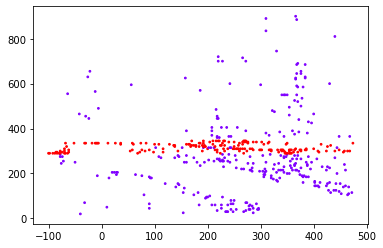

In [78]:
tmp_lab = tmp_labels.copy()
for i, x in enumerate(tmp_labels, start = 0):
    if (tmp_labels[i] > avrg * 2.5):
        tmp_lab[i] = 1
    else:
        tmp_lab[i] = -1
        
plt.figure()
plt.scatter(new_data[:,0], new_data[:,1], c = tmp_lab, cmap='rainbow', s = 3)

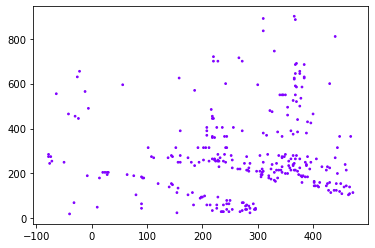

In [79]:
data_no_clear, labels_no_clear = remove_from_cluster(new_data, tmp_lab, 1);

#!!!!!!!!!!!!!!!!!USELESS!!!!!!!!!!!!!!!!!
tmp_lab = labels_no_clear.copy()
for i, x in enumerate(labels_no_clear, start = 0):
    if (labels_no_clear[i] > avrg * 2):
        tmp_lab[i] = 1
    else:
        tmp_lab[i] = -1
        
plt.figure()
plt.scatter(data_no_clear[:,0], data_no_clear[:,1], c = tmp_lab, cmap='rainbow', s = 3)

Amount of dots per line:


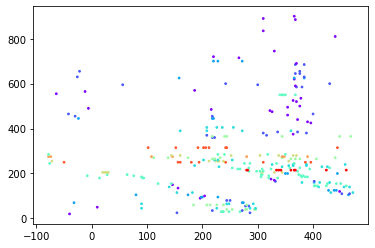

In [80]:
dic = {}
for x in data_no_clear:
    dic.setdefault(x[1], [])
    dic[x[1]].append(x[0])
    
#print(dictionary)

tmp_labels = []
for x in data_no_clear:
    tmp = len(dic[x[1]])
    tmp_labels.append(tmp)
    
#print(tmp_labels)

#calculating average

#for i, x in enumerate(tmp_labels, start = 0):
   # tmp_labels[i] 
    
print("Amount of dots per line:")
plt.figure()
plt.scatter(data_no_clear[:,0], data_no_clear[:,1], c = tmp_labels, cmap='rainbow', s = 3)

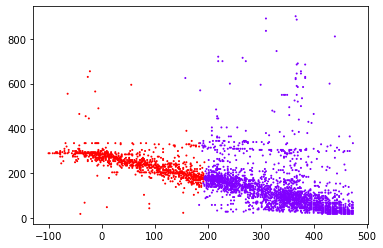

In [81]:
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(dataset[:, 2:4])
plt.scatter(dataset[:,0], dataset[:,1], c=spectral.labels_, cmap='rainbow', s = 1)

[-1  8  9 ... -1 -1 -1]


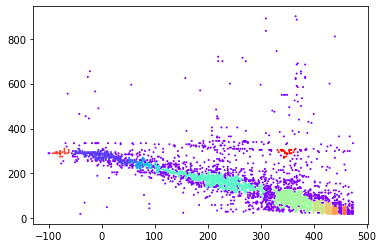

In [82]:
optics = cluster.OPTICS(min_samples=3, xi=0.17, min_cluster_size=20)
optics.fit(dataset[:, 2:4])
plt.scatter(dataset[:,0], dataset[:,1], c=optics.labels_, cmap='rainbow', s = 1)
print(optics.labels_)

In [83]:
new_data, labels = remove_non_clustered(dataset, optics.labels_);   
plt.scatter(new_data[:,0], new_data[:,1], c=labels, cmap='rainbow', s = 1)

NameError: name 'remove_non_clustered' is not defined